In [1]:
from owslib.wms import WebMapService
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
wms = WebMapService('https://kartta.hel.fi/ws/geoserver/avoindata/wms',version='1.3.0')

In [3]:
wms.identification.type

'WMS'

In [4]:
wms.identification.version

'1.3.0'

In [5]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [6]:
wms.identification.title

'Helsinki_WMS'

In [7]:
wms.identification.abstract

'Helsingin kaupunkimittauspalvelujen WMS-rajapintapalvelu kansalais- ja asiakaskäyttäjille. A Helsinki City survey division WMS api-service for clients and citizens'

In [8]:
##  see different formation we can get image 
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'application/atom+xml',
 'application/json;type=geojson',
 'application/json;type=topojson',
 'application/json;type=utfgrid',
 'application/pdf',
 'application/rss+xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kml+xml;mode=networklink',
 'application/vnd.google-earth.kmz',
 'application/vnd.mapbox-vector-tile',
 'image/geotiff',
 'image/geotiff8',
 'image/gif',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/svg+xml',
 'image/tiff',
 'image/tiff8',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8',
 'text/html; subtype=openlayers',
 'text/html; subtype=openlayers2',
 'text/html; subtype=openlayers3']

In [9]:
wms.getOperationByName('GetMap').methods

[{'type': 'Get',
  'url': 'https://kartta.hel.fi/ws/geoserver/avoindata/ows?SERVICE=WMS&'}]

In [10]:
## Layers
list(wms.contents)

['avoindata:Kantakartta',
 'avoindata:Kantakartta_harmaa',
 'avoindata:Kantakartta_varillinen',
 'avoindata:Kantakartta_rajat',
 'avoindata:Kantakartta_valkoinen',
 'avoindata:Kantakartan_maastotiedot',
 'avoindata:Kantakartta_pohja',
 'avoindata:Kantakartta_paakohteet',
 'avoindata:Karttasarja',
 'avoindata:Karttasarja_harmaa',
 'avoindata:Kiinteistokartta',
 'avoindata:Kiinteistokartan_maastotiedot',
 'avoindata:Kiinteistokartta_pohja',
 'avoindata:Kiinteistokartta_paakohteet',
 'avoindata:Opaskartta_Helsinki',
 'avoindata:Opaskartta_Helsinki_harmaa',
 'avoindata:Opaskartta_Helsinki_harvanimi',
 'avoindata:Opaskartta_Helsinki_harvanimi_harmaa',
 'avoindata:Opaskartta_Helsinki_4m',
 'avoindata:Opaskartta_Helsinki_4m_harmaa',
 'avoindata:Opaskartta_alue',
 'avoindata:Opaskartta_alueenviiva',
 'avoindata:Opaskartta_muuviiva',
 'avoindata:Opaskartta_nimisto',
 'avoindata:Opaskartta_harvanimi_nimisto',
 'avoindata:Opaskartta_PKS',
 'avoindata:Opaskartta_PKS_4m',
 'avoindata:Opaskartta_PKS

In [11]:
wms['avoindata:Ortoilmakuva_2019_5cm']

In [12]:
#wms.getOperationByName('GetMap').formatOptions

In [13]:
layer = wms['avoindata:Ortoilmakuva_2019_5cm']

In [14]:
print("Abstract: ", layer.abstract)
print("BBox: ", layer.boundingBoxWGS84)
print("CRS: ", layer.crsOptions)
print("Styles: ", layer.styles)
print("Timestamps: ", layer.timepositions)
#HTML(layer.parent.abstract)

Abstract:  None
BBox:  (24.764732945863038, 60.0080107531311, 25.289558715996222, 60.322459856333225)
CRS:  ['EPSG:3048', 'EPSG:3880', 'EPSG:3873', 'EPSG:2393', 'CRS:84', 'EPSG:3386', 'EPSG:3875', 'EPSG:3883', 'EPSG:2391', 'EPSG:3874', 'EPSG:3387', 'EPSG:4258', 'EPSG:3879', 'EPSG:3046', 'EPSG:3881', 'EPSG:3882', 'EPSG:3878', 'EPSG:3857', 'EPSG:3067', 'EPSG:4326', 'EPSG:3876', 'EPSG:3885', 'EPSG:4123', 'EPSG:2392', 'EPSG:2394', 'EPSG:3047', 'EPSG:3877', 'EPSG:3884']
Styles:  {'rasteri': {'title': 'rasteri', 'legend': 'https://kartta.hel.fi/ws/geoserver/avoindata/ows?service=WMS&request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=avoindata%3AOrtoilmakuva_2019_5cm', 'legend_width': '20', 'legend_height': '20', 'legend_format': 'image/png'}}
Timestamps:  None


In [16]:
print("Styles: ", layer.styles)

Styles:  {'rasteri': {'title': 'rasteri', 'legend': 'https://kartta.hel.fi/ws/geoserver/avoindata/ows?service=WMS&request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=avoindata%3AOrtoilmakuva_2019_5cm', 'legend_width': '20', 'legend_height': '20', 'legend_format': 'image/png'}}


In [ ]:
csr = layer.crsOptions
for c in ['EPSG:4123']:
    print(c)
    img = wms.getmap(layers=['yleinen_tai_muu_alue',],
                         
                        srs=c,
                        bbox=(24.764732945863038, 59.90927898645569, 25.289558715996222, 60.322459856333225),
                        size=(5000, 5000),
                    # height=1000,
                     #width = 1000,
                        format='image/png',
                     transparent = True
                         )
    out = open(c+'.png', 'wb')
    out.write(img.read())
    out.close()

#### Parsing xml 

In [2]:
import requests
from xml.etree import ElementTree as et
from bs4 import BeautifulSoup

In [3]:
url = 'https://kartta.hel.fi/ws/geoserver/avoindata/wms?request=getCapabilities'
response = requests.get(url)

In [4]:
soup =  BeautifulSoup(response.content, 'lxml')

In [5]:
layers = soup.find_all('layer')

In [6]:
for layer in layers:
    if (layer.title.text)=='Ortoilmakuva_2019_5cm':
        ex_geographicBoundingBox_data = layer.findChildren('ex_geographicboundingbox',recursive=False)
        boundingBox_data = layer.findChildren('boundingbox',recursive=False)
        #'ex_geographicboundingbox',
        break

In [8]:
#boundingBox_data
ex_geographicBoundingBox_data[0]

<ex_geographicboundingbox>
<westboundlongitude>24.764732945863038</westboundlongitude>
<eastboundlongitude>25.289558715996222</eastboundlongitude>
<southboundlatitude>60.0080107531311</southboundlatitude>
<northboundlatitude>60.322459856333225</northboundlatitude>
</ex_geographicboundingbox>

In [9]:
ex_geographicBoundingBox_data = ex_geographicBoundingBox_data[0].text.split()
## format westboundlongitude,eastboundlongitude, southboundlatitude,northboundlatitude

['24.764732945863038',
 '25.289558715996222',
 '60.0080107531311',
 '60.322459856333225']

In [83]:
### get all the epsg and related with boudingbox
csr = []
bounding = []
for data in boundingBox_data:
    data = list(data.attrs.values())
    csr.append(data[0])
    bounding.append(list(map(float, data[1:])))

In [99]:
## Get images 
for i in range(len(csr)):
    img = wms.getmap(layers=['avoindata:Ortoilmakuva_2019_5cm'],
                      
                        srs=csr[i],
                        bbox=bounding[i], #Value is minx,miny,maxx,maxy in units of the SRS.
                        size=(5000, 5000),
                      format='image/png',
                     transparent = True
                    )
    out = open(csr[i]+'.png', 'wb')
    out.write(img.read())
    out.close()
   

In [95]:
# the 'img' is a ResponseWrapper object. So, we need read its content to get the actual bytes for the png file. 
#To avoid writing the data to disk, 
#we’ll mimic a file object in memory using the io.BytesIO function.
 #image = io.BytesIO(img.read())
  #  data = plt.imread(image)
   # plt.imshow(data)


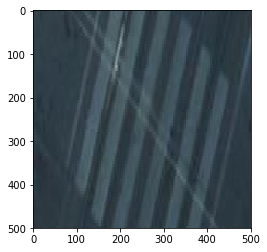

In [37]:
image = io.BytesIO(img.read())
data = plt.imread(image)
plt.imshow(data)